<a href="https://colab.research.google.com/github/atharva0001/A.I-Project-2/blob/main/EDA_ode_spa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# @title
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/content/all_files_in_one1.csv')



<ipython-input-72-949f160d233d>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/all_files_in_one1.csv')


In [74]:
# @
# Summary statistics for numerical columns
summary_statistics = data.describe().transpose()
summary_statistics


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1048575.0,46582.664733,28881.150911,0.00,21845.00,44646.00,69223.00,110798.00
Qty,1048575.0,1.001026,0.049361,-1.00,1.00,1.00,1.00,14.00
Sales (Exc. Tax),1048575.0,2293.784758,14090.512467,-19455.08,991.00,1640.35,2504.50,6355932.00
Tax,1048575.0,315.222139,2368.708608,-3501.92,0.00,180.00,392.54,1144067.76
Sales(Inc. Tax),1048575.0,2609.006898,16441.049404,-22957.00,1026.12,1856.15,2832.00,7499999.76
Redeemed,1048575.0,267.453998,683.047831,0.00,0.00,0.00,0.00,50000.00
Collected,1048575.0,1138.673734,6283.564679,-22957.00,0.00,0.00,1294.50,1000000.00
Due,1048575.0,1202.879166,15307.583780,-1956.50,0.00,0.26,1796.30,7499999.76
monthExtention,1048575.0,4.972476,3.035028,1.00,2.00,5.00,7.00,12.00


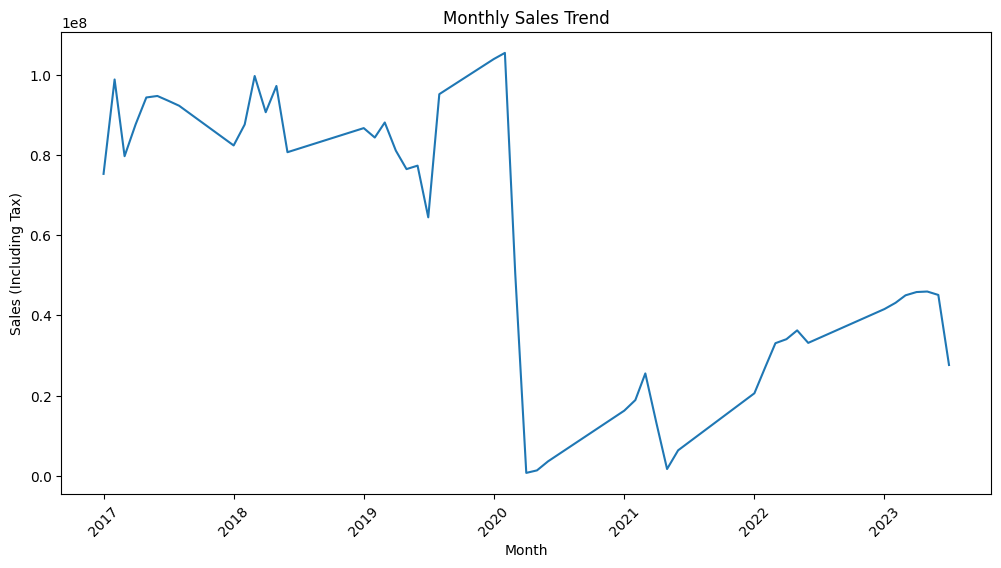

In [75]:
# Converting 'Sale Date' to datetime format
data['Sale Date'] = pd.to_datetime(data['Sale Date'], dayfirst=True)

# Grouping sales by month and year
monthly_sales = data.groupby(data['Sale Date'].dt.to_period('M')).agg({'Sales(Inc. Tax)': 'sum'}).reset_index()
monthly_sales['Sale Date'] = monthly_sales['Sale Date'].dt.to_timestamp()

# Plotting the sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sale Date', y='Sales(Inc. Tax)', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (Including Tax)')
plt.xticks(rotation=45)
plt.show()


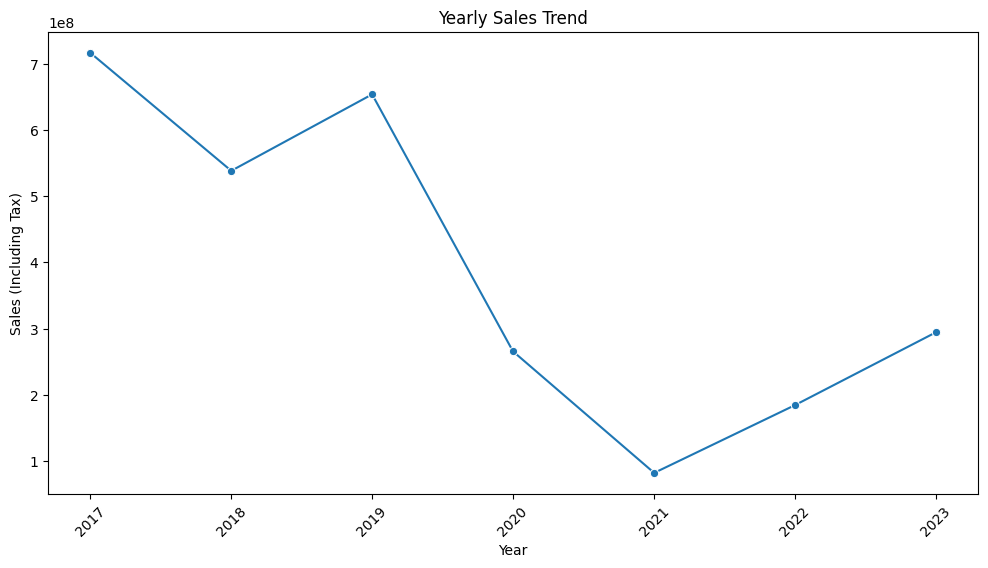

In [76]:
# Grouping sales by year
yearly_sales = data.groupby(data['Sale Date'].dt.to_period('Y')).agg({'Sales(Inc. Tax)': 'sum'}).reset_index()
yearly_sales['Sale Date'] = yearly_sales['Sale Date'].dt.to_timestamp()

# Plotting the yearly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sale Date', y='Sales(Inc. Tax)', data=yearly_sales, marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales (Including Tax)')
plt.xticks(rotation=45, ticks=yearly_sales['Sale Date'], labels=yearly_sales['Sale Date'].dt.year)
plt.show()


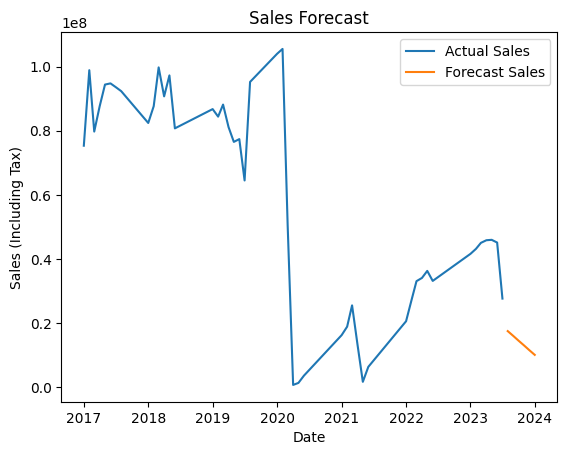

In [77]:
from sklearn.linear_model import LinearRegression

# Converting 'Sale Date' to datetime format
data['Sale Date'] = pd.to_datetime(data['Sale Date'], dayfirst=True)

# Grouping sales by month and year
monthly_sales = data.groupby(data['Sale Date'].dt.to_period('M')).agg({'Sales(Inc. Tax)': 'sum'}).reset_index()
monthly_sales['Sale Date'] = monthly_sales['Sale Date'].dt.to_timestamp()

# Adding Month and Year columns
monthly_sales['Month'] = monthly_sales['Sale Date'].dt.month
monthly_sales['Year'] = monthly_sales['Sale Date'].dt.year

# Creating features and target
X = monthly_sales[['Month', 'Year']]
y = monthly_sales['Sales(Inc. Tax)']

# Fitting linear regression model
model = LinearRegression()
model.fit(X, y)

# Making predictions for the next 6 months (July to December 2023)
next_months = pd.DataFrame({'Month': [7, 8, 9, 10, 11, 12], 'Year': [2023]*6})
predictions = model.predict(next_months)

# Plotting the forecast
plt.plot(monthly_sales['Sale Date'], y, label='Actual Sales')
plt.plot(pd.date_range(start='2023-07-01', periods=6, freq='M'), predictions, label='Forecast Sales')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales (Including Tax)')
plt.legend()
plt.show()


In [78]:
# Total unredeemed sales or due amounts
total_unredeemed_sales = data['Due'].sum()
print("total_unredeemed_sales: Rs",total_unredeemed_sales)


total_unredeemed_sales: Rs 1261309021.3900006


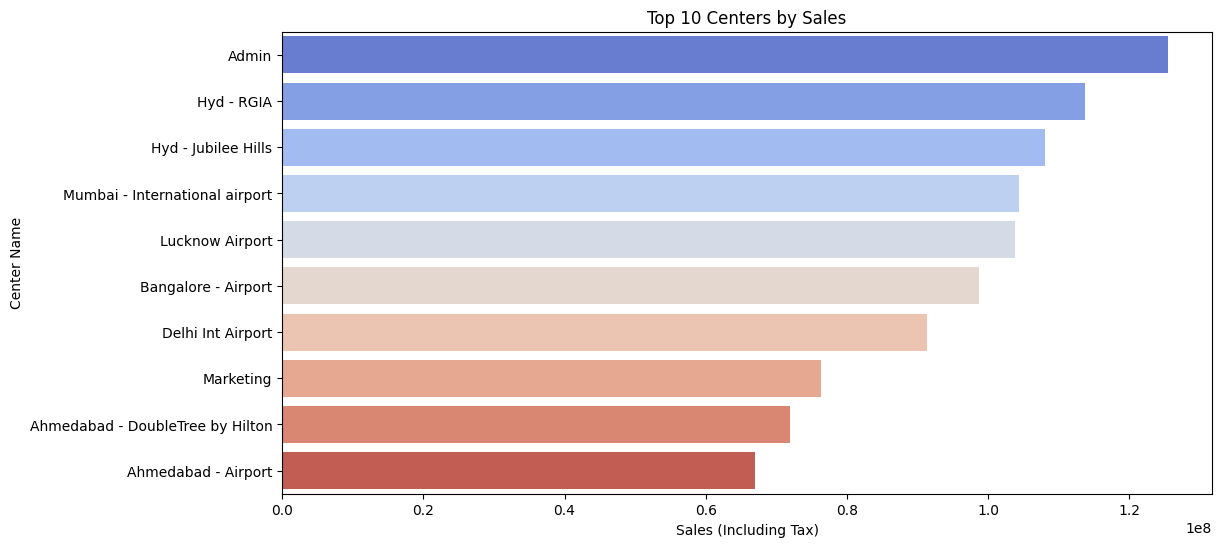

In [79]:
# Grouping sales by center
center_sales = data.groupby('Center Name').agg({'Sales(Inc. Tax)': 'sum'}).reset_index()

# Plotting sales by center
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales(Inc. Tax)', y='Center Name', data=center_sales.nlargest(10, 'Sales(Inc. Tax)'), palette='coolwarm')
plt.title('Top 10 Centers by Sales')
plt.xlabel('Sales (Including Tax)')
plt.ylabel('Center Name')
plt.show()


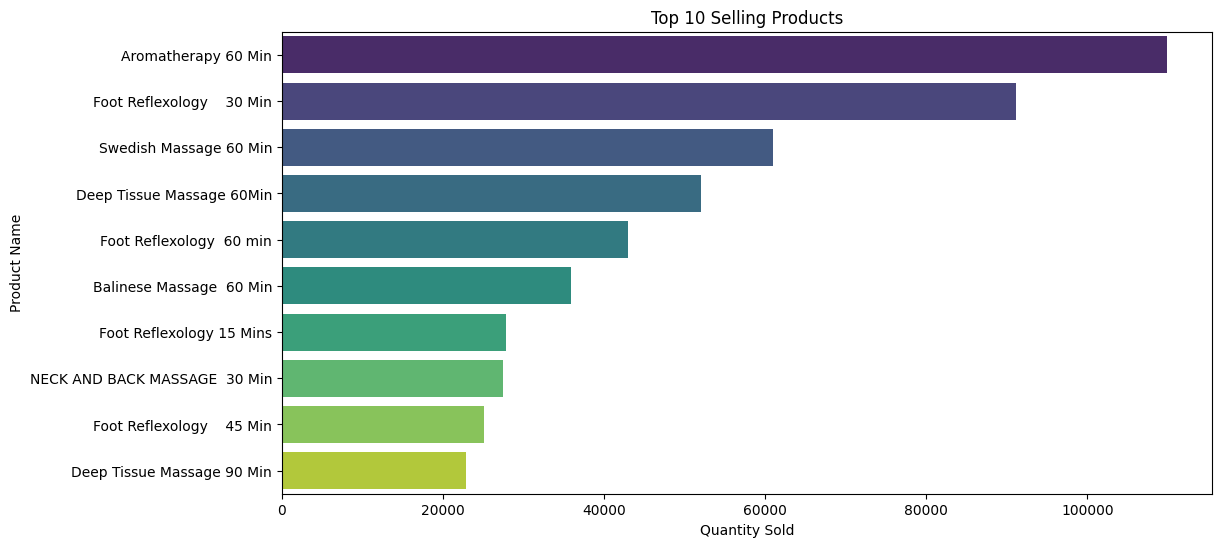

In [80]:
# Finding the top 10 selling products by quantity
top_products = data.groupby('Item Name').agg({'Qty': 'sum'}).nlargest(10, 'Qty').reset_index()

# Plotting the top selling products
plt.figure(figsize=(12, 6))
sns.barplot(x='Qty', y='Item Name', data=top_products, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

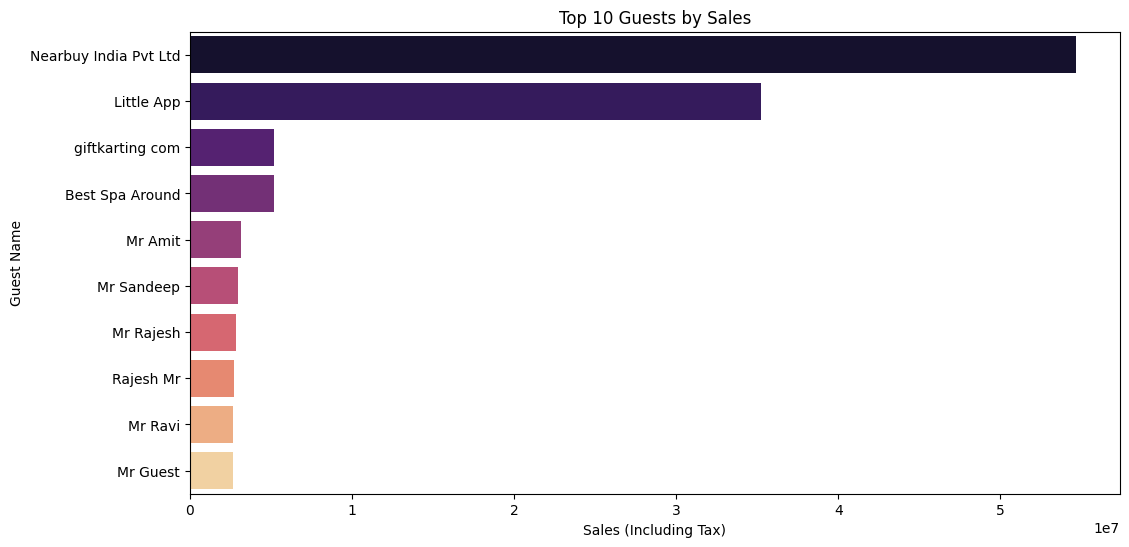

In [81]:
# Top 10 Guests by Sales
top_guests = data.groupby('Guest Name').agg({'Sales(Inc. Tax)': 'sum'}).nlargest(10, 'Sales(Inc. Tax)').reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales(Inc. Tax)', y='Guest Name', data=top_guests, palette='magma')
plt.title('Top 10 Guests by Sales')
plt.xlabel('Sales (Including Tax)')
plt.ylabel('Guest Name')
plt.show()

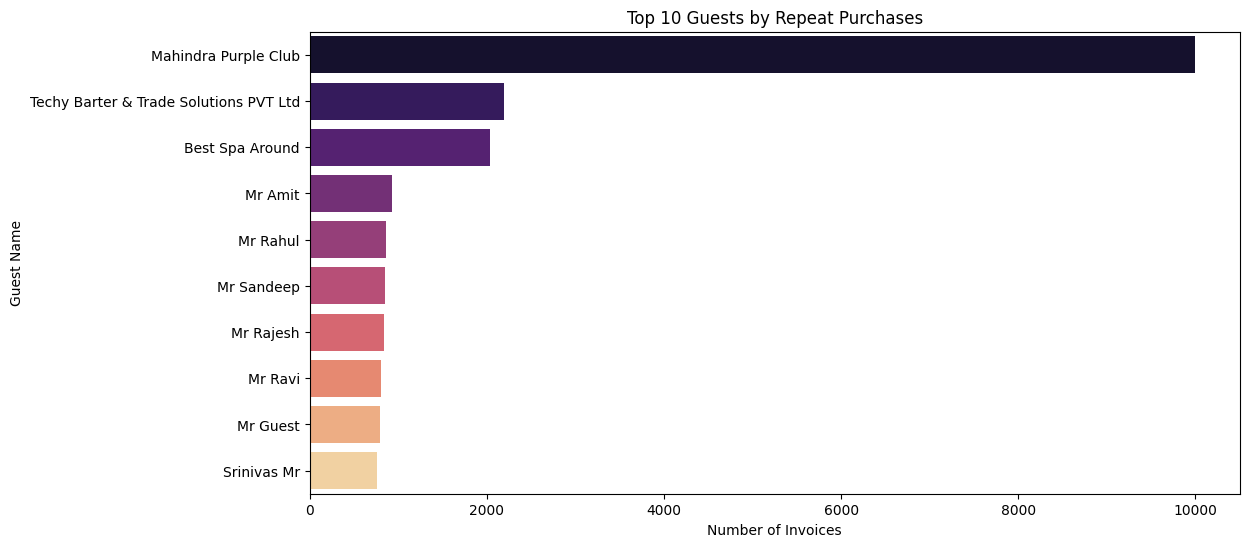

In [82]:
# Counting the number of unique invoices for each guest
guest_returns = data.groupby('Guest Name')['Invoice No'].nunique().reset_index().nlargest(10, 'Invoice No')

# Plotting the top guests by repeat purchases
plt.figure(figsize=(12, 6))
sns.barplot(x='Invoice No', y='Guest Name', data=guest_returns, palette='magma')
plt.title('Top 10 Guests by Repeat Purchases')
plt.xlabel('Number of Invoices')
plt.ylabel('Guest Name')
plt.show()


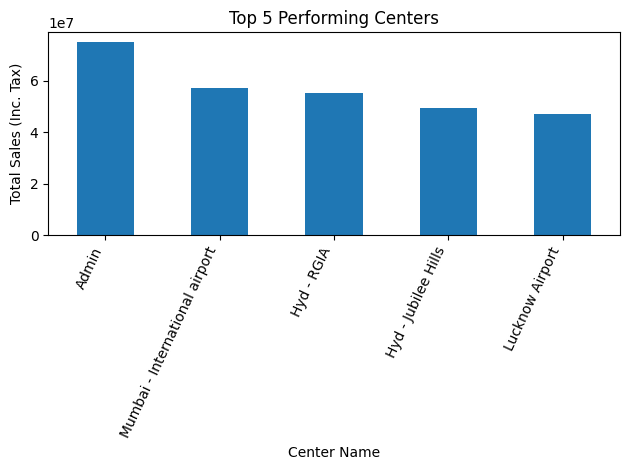

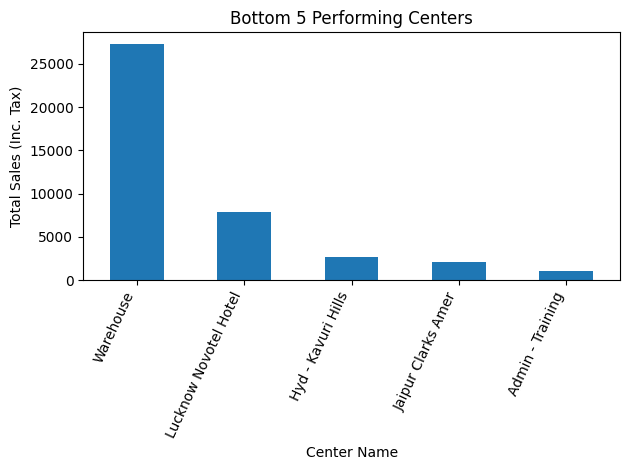

In [84]:
# Adjusting the plot for the top 5 performing centers with proper x-axis rotation
top_5_centers.plot(kind='bar', title='Top 5 Performing Centers')
plt.ylabel('Total Sales (Inc. Tax)')
plt.xlabel('Center Name')
plt.xticks(rotation=65, ha='right')
plt.tight_layout() # Adjusting layout for better visibility
plt.show()

# Adjusting the plot for the bottom 5 performing centers with proper x-axis rotation
bottom_5_centers.plot(kind='bar', title='Bottom 5 Performing Centers')
plt.ylabel('Total Sales (Inc. Tax)')
plt.xlabel('Center Name')
plt.xticks(rotation=65, ha='right')
plt.tight_layout() # Adjusting layout for better visibility
plt.show()


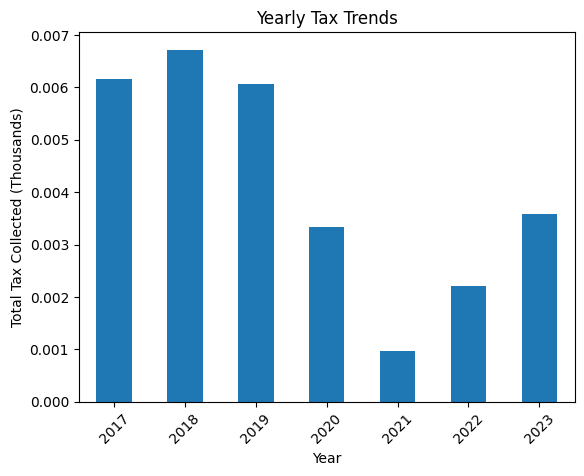

In [85]:
# Determining the appropriate unit for the y-axis label
max_tax = yearly_tax_trends.max()
if max_tax >= 1e7: # Crores
    unit_label = "Crores"
    yearly_tax_trends /= 1e7
elif max_tax >= 1e5: # Lakhs
    unit_label = "Lakhs"
    yearly_tax_trends /= 1e5
elif max_tax >= 1e6: # Millions
    unit_label = "Millions"
    yearly_tax_trends /= 1e6
else: # Thousands
    unit_label = "Thousands"
    yearly_tax_trends /= 1e3

# Plotting the yearly tax trends with the updated y-axis label
yearly_tax_trends.plot(kind='bar', title="Yearly Tax Trends")
plt.xlabel('Year')
plt.ylabel(f'Total Tax Collected ({unit_label})')
plt.xticks(rotation=45)
plt.show()


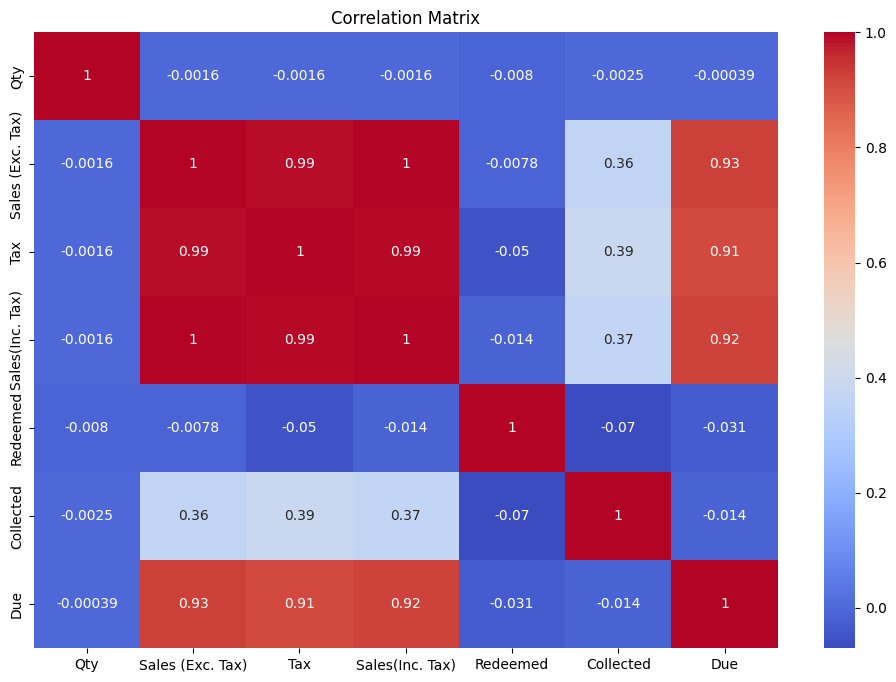

In [87]:
# Correlation Matrix
correlation_matrix = data[['Qty', 'Sales (Exc. Tax)', 'Tax', 'Sales(Inc. Tax)', 'Redeemed', 'Collected', 'Due']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

